In [222]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('..')

from graph_tool.all import *
import numpy as np
import matplotlib.pyplot as plt

from scripts.generate_network import erdos_renyi_v1, erdos_renyi_v2
from scripts.random_attacks import simulate_random_attack
from scripts import visualization as viz

viz.load_matplotlib()
plt = viz.plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [263]:
%%time
g = erdos_renyi_v2(1000, 0.004)

CPU times: user 2.51 ms, sys: 960 µs, total: 3.47 ms
Wall time: 3.47 ms


<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f7097091fa0, at 0x7f7097050ca0>

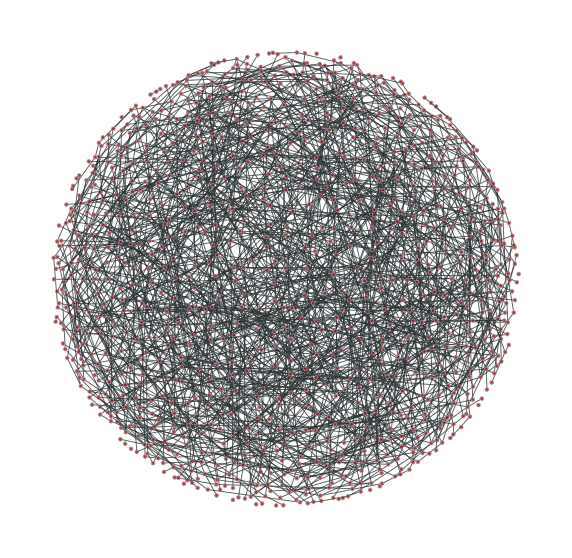

In [264]:
plt.switch_backend("cairo")
fig, ax = plt.subplots(figsize=(10, 10))
plt.axis('off')
pos = arf_layout(g)

graph_draw(g, pos=pos, vertex_size=0.2, mplfig=ax)

In [259]:
ps = np.linspace(0.1, 1, 10)

g = erdos_renyi_v2(10000, 0.0005)

mean_sizes, std_sizes = simulate_random_attack(g, ps, ntimes=5)

100%|██████████| 10/10 [00:06<00:00,  1.51it/s]


<ipython-input-260-01a82bccaa1c>:5: UserWarning: Matplotlib is currently using cairo, which is a non-GUI backend, so cannot show the figure.
  plt.show()


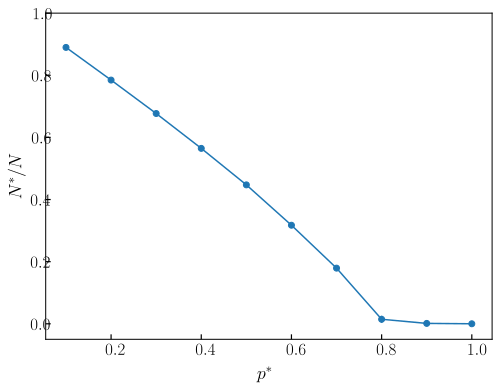

In [260]:
plt.errorbar(ps, mean_sizes, yerr=std_sizes, fmt='o-')
plt.ylim(-0.05, 1)
plt.ylabel('$N^*/N$', fontsize=18)
plt.xlabel('$p^*$', fontsize=18)
plt.show()